In [68]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta
import pandas as pd

import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [2]:
first = '1-1-2020'
num_months = 12

first_dt = datetime.strptime(first, "%d-%m-%Y")
dates = []
for x in range(num_months):
    start_dt = first_dt + relativedelta(months=1*x)
    start_date = start_dt.strftime("%d-%m-%Y")
    end_dt = start_dt + relativedelta(months=1) - relativedelta(days=1)
    end_date = end_dt.strftime("%d-%m-%Y")
    dates.append((start_date, end_date))
    print(start_date, '      ', end_date)

01-01-2020        31-01-2020
01-02-2020        29-02-2020
01-03-2020        31-03-2020
01-04-2020        30-04-2020
01-05-2020        31-05-2020
01-06-2020        30-06-2020
01-07-2020        31-07-2020
01-08-2020        31-08-2020
01-09-2020        30-09-2020
01-10-2020        31-10-2020
01-11-2020        30-11-2020
01-12-2020        31-12-2020


In [62]:
data_dir = '/g/data/er8/users/cd3022/solar_drought/REZ_tilting/ideal_ratio/regional/0.1'
data = [xr.open_dataarray(f'{data_dir}/{start}___{end}') for start, end in dates]
da = xr.concat(data, dim='time').sortby("time")

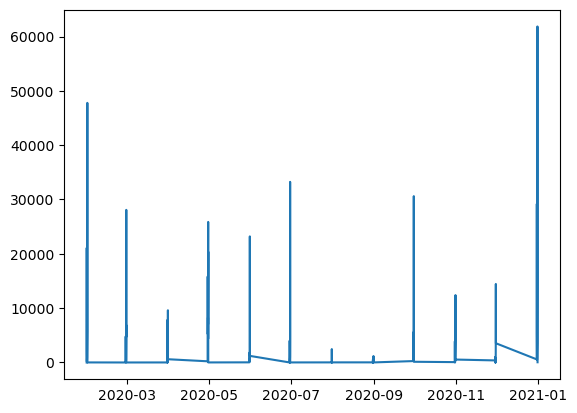

In [63]:
data = []
for time in np.unique(da.time):
    data.append((da.sel(time=time).size))

plt.plot(np.unique(da.time), data)

In [69]:
dates = pd.to_datetime(np.unique(da.time))
dates

DatetimeIndex(['2020-01-30 19:40:00', '2020-01-30 19:50:00',
               '2020-01-30 20:10:00', '2020-01-30 20:20:00',
               '2020-01-30 20:30:00', '2020-01-30 20:40:00',
               '2020-01-30 20:50:00', '2020-01-30 21:00:00',
               '2020-01-30 21:10:00', '2020-01-30 21:20:00',
               ...
               '2020-12-31 08:00:00', '2020-12-31 08:10:00',
               '2020-12-31 08:20:00', '2020-12-31 08:40:00',
               '2020-12-31 08:50:00', '2020-12-31 09:00:00',
               '2020-12-31 09:10:00', '2020-12-31 09:20:00',
               '2020-12-31 09:30:00', '2020-12-31 09:40:00'],
              dtype='datetime64[ns]', length=825, freq=None)

In [74]:
np.unique([date.day for date in dates])

array([28, 29, 30, 31])